
## <center>  Analysis of Scala's Github Project Repository Data </center>

###### With almost 30k commits and a history spanning over ten years, Scala is a mature programming language. It is a general-purpose programming language that has recently become another prominent language for data scientists.

###### Scala is also an open source project. Open source projects have the advantage that their entire development histories like who made changes, what was changed, code reviews etc. are publicly available.

###### We're going to read in, clean up and visualize the real world project repository of Scala that spans data from a version control system (Git) as well as a project hosting site (GitHub). We will find out who has had the most influence on its development and who are the experts.

#### The dataset we will use which has been previously mined and extracted from GitHub, is comprised of three files:


#### 1- pulls_2011-2013.csv contains the basic information about the pull requests and spans from the end of 2011 up to (but not including) 2014.

#### 2- pulls_2014-2018.csv contains identical information and spans from 2014 up to 2018.

#### 3- pull_files.csv contains the files that were modified by each pull request.

In [254]:
import pandas as pd

pulls_one = pd.read_csv(r'D:\New folder\pulls_2011-2013.csv')
pulls_two = pd.read_csv(r'D:\New folder\pulls_2014-2018.csv')
pull_files = pd.read_csv(r'D:\New folder\pull_files.csv') 

print(pulls_one.head(2))
print(50*'*')
print(pulls_two.head(2))
print(50*'*')
print(pull_files.head(2))

        pid         user                  date
0  11166973  VladimirNik  2013-12-31T23:10:55Z
1  11161892      Ichoran  2013-12-31T16:55:47Z
**************************************************
         pid      user                  date
0  163314316    hrhino  2018-01-16T23:29:16Z
1  163061502  joroKr21  2018-01-15T23:44:52Z
**************************************************
         pid                              file
0  163314316   test/files/pos/t5638/Among.java
1  163314316  test/files/pos/t5638/Usage.scala


##  <center> Preparing and Cleaning Data </center>
#### First, we will need to combine the data from the two separate pull DataFrames.

Next, the raw data extracted from GitHub contains dates in the ISO8601 format. However, pandas imports them as regular strings. To make our analysis easier, we need to convert the strings into Python's DateTime objects. DateTime objects have the important property that they can be compared and sorted.

The pull request times are all in UTC (also known as Coordinated Universal Time). The commit times, however, are in the local time of the author with time zone information (number of hours difference from UTC). To make comparisons easy, we should convert all times to UTC.

In [255]:
# Append pulls_one to pulls_two
pulls = pulls_one.append(pulls_two,ignore_index=True)
print(f"before converting date :\n\n{pulls.head()}")

# Convert the date for the pulls object
pulls["date"] = pd.to_datetime(pulls["date"],utc=True)
print(f"\n\nafter converting date : \n\n{pulls.head()}")

before converting date :

        pid         user                  date
0  11166973  VladimirNik  2013-12-31T23:10:55Z
1  11161892      Ichoran  2013-12-31T16:55:47Z
2  11153894      Ichoran  2013-12-31T02:41:13Z
3  11151917      rklaehn  2013-12-30T23:45:47Z
4  11131244        qerub  2013-12-29T17:21:01Z


after converting date : 

        pid         user                      date
0  11166973  VladimirNik 2013-12-31 23:10:55+00:00
1  11161892      Ichoran 2013-12-31 16:55:47+00:00
2  11153894      Ichoran 2013-12-31 02:41:13+00:00
3  11151917      rklaehn 2013-12-30 23:45:47+00:00
4  11131244        qerub 2013-12-29 17:21:01+00:00


## <center> Merging DataFrames </center>
#### The data extracted comes in two separate files. Merging the two DataFrames will make it easier for us to analyze the data.


In [256]:
data = pulls.merge(pull_files,on="pid")
print(f"dataset shape : {data.shape}")
data.head()

dataset shape : (85588, 4)


,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....


## <center> Is the project still actively maintained? </center>
The activity in an open source project is not very consistent. Some projects might be active for many years after the initial release, while others can slowly taper out into oblivion. Before committing to contributing to a project, it is important to understand the state of the project. Is development going steadily, or is there a drop? Has the project been abandoned altogether?

The data used in this project was collected in January of 2018. We are interested in the evolution of the number of contributions up to that date.

For Scala, we will do this by plotting a chart of the project's activity. We will calculate the number of pull requests submitted each (calendar) month during the project's lifetime. We will then plot these numbers to see the trend of contributions.

A helpful reminder of how to access various components of a date can be found in this exercise of Data Manipulation with pandas

Additionally, recall that you can group by multiple variables by passing a list to .groupby(). This video from Data Manipulation with pandas should help!

<AxesSubplot:xlabel='month, year'>

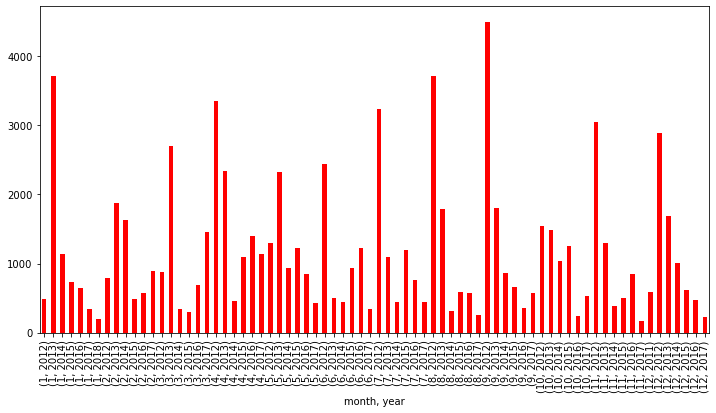

In [257]:
%matplotlib inline

# column that will store the month
data["month"] = data["date"].dt.month

# column that will store the year
data["year"] = data["date"].dt.year

# Group by the month and year and count the pull requests
counts = data.groupby(["month","year"])["pid"].count()

# Plot the results
counts.plot(kind="bar", figsize = (12,6), color="r",xlabel="month, year")

## <center> Is there camaraderie in the project? </center>
The organizational structure varies from one project to another and it can influence success as a contributor. A project that has a very small community might not be the best one to start working on. The small community might indicate a high barrier of entry. This can be caused by several factors including a community that is reluctant to accept pull requests from "outsiders", that the code base is hard to work with etc. However, a large community can serve as an indicator that the project is regularly accepting pull requests from new contributors. Such a project would be a good place to start.

In order to evaluate the dynamics of the community, we will plot a histogram of the number of pull requests submitted by each user. A distribution that shows that there are few people that only contribute a small number of pull requests can be used as in indicator that the project is not welcoming of new contributors.

<AxesSubplot:ylabel='Frequency'>

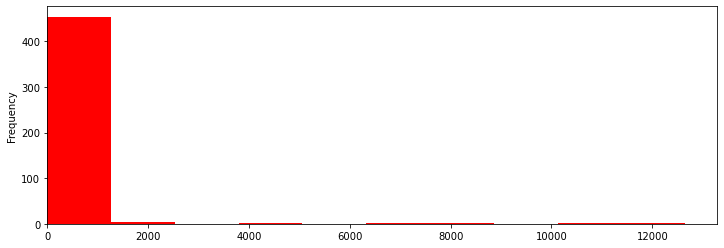

In [258]:
%matplotlib inline

# Group by the submitter
# by_user = data.groupby("user")["pid"].count()        #use any form
by_user=data.groupby('user')['pid'].count()

# Plot the histogram
by_user.plot(kind="hist",figsize = (12,4), color="r",xlim=(0))

## <center> Who made the last ten pull requests on a given file? </center>
Open source projects suffer from fluctuating membership. This makes the problem of finding the right person more challenging: the person has to be knowledgeable and still be involved in the project. A person that contributed a lot in the past might no longer be available (or willing) to help. To get a better understanding, we need to investigate the more recent history of that particular part of the system.
We will look at the history of src/compiler/scala/reflect/reify/phases/Calculate.scala

In [259]:
file='src/compiler/scala/reflect/reify/phases/Calculate.scala'
d_file=data[data['file']==file]
date_file=d_file.nlargest(10,'date')
print(set(date_file['user']))

{'zuvizudar', 'soc', 'xeno-by', 'retronym', 'bjornregnell', 'starblood'}


## <center>The pull requests of two special developers</center>
Now that we have identified two potential contacts in the projects, we need to find the person who was most involved in the project in recent times. That person is most likely to answer our questions. For each calendar year, we are interested in understanding the number of pull requests the authors submitted. This will give us a high-level image of their contribution trend to the project

<AxesSubplot:xlabel='date'>

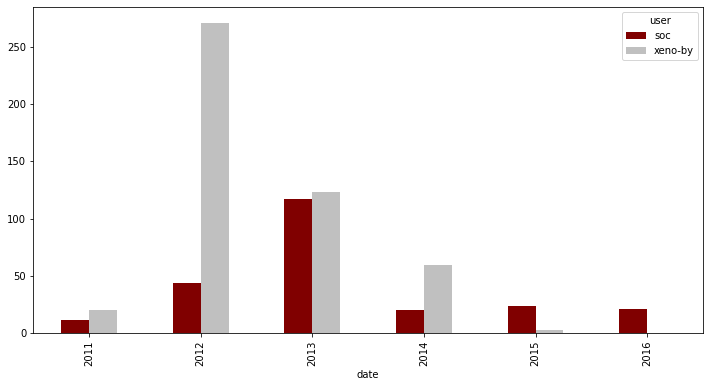

In [260]:
%matplotlib inline

# The developers we are interested in
authors = ["xeno-by", "soc"]

# Get all the developers' pull requests
by_author = pulls[pulls["user"].isin(authors)]

# Count the number of pull requests submitted each year
counts = by_author.groupby([by_author['user'], by_author['date'].dt.year]).agg({"pid": "count"}).reset_index()

# Convert the table to a wide format
counts_wide = counts.pivot_table(index="date", columns="user", values="pid", fill_value=0)

# Plot the results
counts_wide.plot(kind="bar", figsize = (12,6), color=["maroon","silver"])

## <center> Visualizing the contributions of each developer </center>
As mentioned before, it is important to make a distinction between the global expertise and contribution levels and the contribution levels at a more granular level (file, submodule etc.) In our case, we want to see which of our two developers of interest have the most experience with the code in a given file. We will measure experience by the number of pull requests submitted that affect that file and how recent those pull requests were submitted.

<AxesSubplot:xlabel='date'>

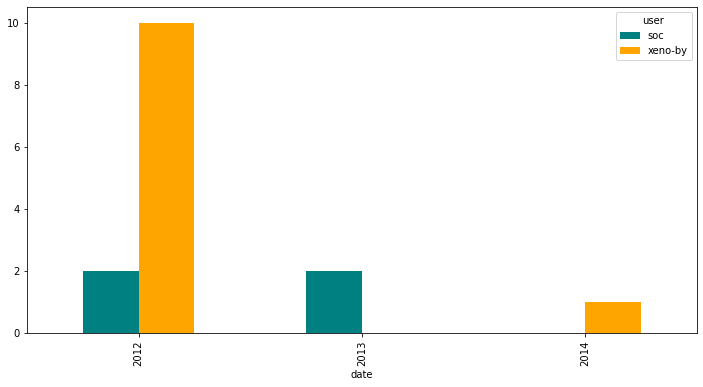

In [261]:
authors = ["xeno-by", "soc"]
file = "src/compiler/scala/reflect/reify/phases/Calculate.scala"

# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data["user"].isin(authors)]

# Select the pull requests that affect the file
by_file = by_author[by_author["file"] == file]

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(["user", by_file["date"].dt.year]).count()["pid"].reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index="date", columns="user", values="pid", fill_value=0)


# Plot the results
by_file_wide.plot(kind="bar", figsize = (12,6), color=["teal","orange"])